# problem statement : Predict the gender of a person based on height and weight

# 1. Data Acqusition

In [15]:
import pandas as pd

In [16]:
data=pd.read_csv('https://raw.githubusercontent.com/madhukarwakhare/datasets/main/GENDER.csv')

In [17]:
data.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [18]:
data.tail()

,Gender,Weight,Height
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [19]:
data.shape

(10000, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Weight  10000 non-null  float64
 2   Height  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [20]:
data.describe()

,Weight,Height
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [10]:
data['Weight'].mean()

66.3675597548656

# Visualization

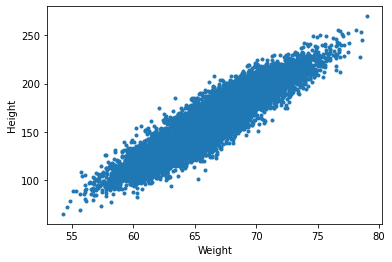

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data['Weight'],data['Height'],marker='.')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [12]:
data.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


In [22]:
data.isnull().sum()

Gender    0
Weight    0
Height    0
dtype: int64

In [5]:
# Feature Engineering
x=data.drop('Gender',axis=1)
y=data['Gender']

In [6]:
x

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [7]:
y

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 10000, dtype: object

In [23]:
# training and testing part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [24]:
x_train.shape

(8000, 2)

In [25]:
x_test.shape

(2000, 2)

In [21]:
y_train.shape

(8000,)

In [22]:
y_test.shape

(2000,)

In [11]:
# selection and training of model
from sklearn.tree import DecisionTreeClassifier
mymodel=DecisionTreeClassifier()
mymodel

DecisionTreeClassifier()

In [12]:
mymodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
## prediction

In [13]:
prediction=mymodel.predict(x_test)
prediction[0:5]

array(['Male', 'Female', 'Male', 'Male', 'Female'], dtype=object)

In [14]:
## evaluation / Checking the performance / Accuaracy
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

0.878

In [28]:
# Saving model deployment 
import pickle
filename='finalized_model.pickle'
pickle.dump(mymodel,open(filename,'wb'))

In [29]:
loaded_model=pickle.load(open(filename,'rb'))
predictions=loaded_model.predict([[66,136]])
predictions

array(['Female'], dtype=object)

In [30]:
predictions=loaded_model.predict([[90,170]])
predictions

array(['Female'], dtype=object)

In [ ]:
import joblib